## **Loading Data**
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# define input features
mem_features = ["MemFrequency", "BlockSize",
                "Latency", "L1_Sets", "L1_Assoc", "L1_BlockSize", "L1_Latency",
                "L2_Sets", "L2_Assoc", "L2_BlockSize", "L2_Latency",
                "L3_Sets", "L3_Assoc", "L3_BlockSize", "L3_Latency"]

hardware_features = ["Frequency", "Cores", "PageSize"]

program_features = ["Instructions", "SimTime", "BranchPredictionAccuracy", "Threads"] # "InstructionsPerSecond", "Cycles", "CyclesPerSecond"

input_features = mem_features + hardware_features + program_features + ["ProgId"]

target = "SpeedUp"


In [ ]:
# load data
data_path = ""
data = pd.read_csv(data_path, usecols=input_features)

# check data types
print(data.dtypes)

## **Calculate SpeedUp**
---

In [ ]:
# calculate speedup for each row
data[target] = data.groupby('ProgId')['SimTime'].transform(lambda x: x / x[data['Threads'] == 1].values[0])

# drop SimTime as it is no longer needed
data.drop(columns=["SimTime"], inplace=True)

# update features to include speedup
input_features = input_features.remove('SimTime').append('SpeedUp')

## **Feature Selection**
---

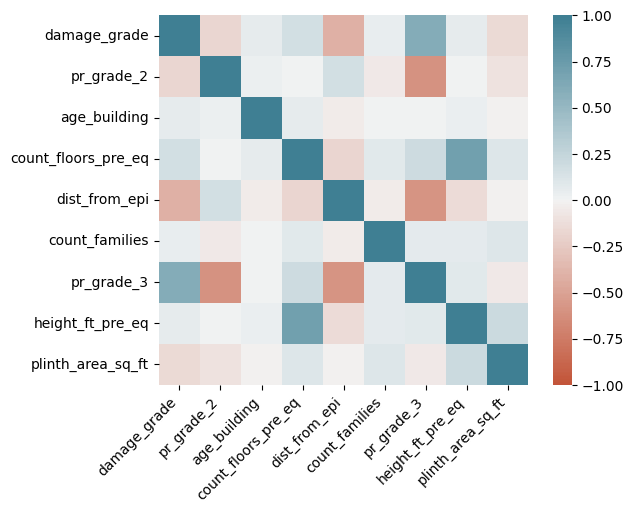

In [ ]:
#exploring useful features through correlation matrix
corr = data.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [3]:
# TODO: remove features if needed
# print("Final modelling attributes along with target variable:\n\n")
# print(data.dtypes)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, max_error, mean_absolute_error


## **Splitting the dataset for training and testing**
---

In [ ]:
#splitting into training and test sets
from sklearn.model_selection import train_test_split
#shuffle data
data = data.sample(frac = 1)
Y = data[target]
X = data.drop(columns=[target])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=39)

## **Exploring Linear Regression**
---

In [ ]:
# train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

In [ ]:
# test the linear regression model
Y_pred = lr_model.predict(X_test)

# get maximum residual error
print("Maximum Residual Error: {}".format(max_error(Y_test, Y_pred)))

# get mean squared error
print("Mean Squared Error: {}".format(mean_squared_error(Y_test, Y_pred)))

# get mean absolute error
print("Mean Absolute Error: {}".format(mean_absolute_error(Y_test, Y_pred)))


## **Conclusion**
---
#TODO
